In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load and prepare the LLama data
llama_data = pd.read_json("/Users/ilyaskussanov/Documents/GitHub/Financial_Sentiment_LLM/03_Sentiment_Analysis/LLama/output_results_final.json").transpose()

# Select the first 6 columns and drop rows with NaN values
llama_data_columns_filtered = llama_data.iloc[:, :6].dropna()

# Rename the index column to 'source' and reset index
llama_data_columns_filtered.index.name = 'source'
llama_data_columns_filtered.reset_index(inplace=True)

# Define the column categories
CATEGORIES = [
    "Unique_ID",
    "Finance",
    "Production",
    "Reserves / Exploration / Acquisitions / Mergers / Divestments",
    "Environment / Regulatory / Geopolitics",
    "Alternative Energy / Lower Carbon",
    "Oil Price / Natural Gas Price / Gasoline Price"
]
llama_data_columns_filtered.columns = CATEGORIES

# Replace errors and "Mixed" values
llama_data_columns_filtered.replace(
    to_replace=['No valid JSON output found after 5 attempts.', 'Mixed'], 
    value='Neutral', 
    inplace=True
)

# Filter rows without NaN
cleaned_llama_data = llama_data_columns_filtered.dropna()

# Function to print unique values in each column
def print_unique_values(df):
    for column in df.columns:
        print(f"Unique values in '{column}':")
        print(df[column].unique())
        print()

# Call the function with cleaned_llama_data
print_unique_values(cleaned_llama_data)

# Columns to filter and valid values
columns_to_filter = [
    'Finance', 
    'Production', 
    'Reserves / Exploration / Acquisitions / Mergers / Divestments', 
    'Environment / Regulatory / Geopolitics', 
    'Alternative Energy / Lower Carbon', 
    'Oil Price / Natural Gas Price / Gasoline Price'
]
valid_values = ['Neutral', 'Positive', 'Negative']

# Filter the DataFrame
filtered_llama_data = cleaned_llama_data[
    cleaned_llama_data[columns_to_filter].apply(lambda col: col.isin(valid_values)).all(axis=1)
]

# Display the filtered DataFrame
print(filtered_llama_data)

# Quality Control Checks

# Check for missing values
print("\nMissing Values:\n", filtered_llama_data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", filtered_llama_data.duplicated().sum())

# Check data types
print("\nData Types:\n", filtered_llama_data.dtypes)

# Basic statistics
print("\nBasic Statistics:\n", filtered_llama_data.describe(include='all'))

# Check unique values in each column again after filtering
print("\nUnique values after filtering:")
print_unique_values(filtered_llama_data)



Unique values in 'Unique_ID':
['PQ-2703147472' 'PQ-2702197510' 'PQ-2697049245' ... 'PQ-2238860015'
 'PQ-2233473767' 'PQ-2232566793']

Unique values in 'Finance':
['Neutral' 'Positive' 'Negative' 'N/A']

Unique values in 'Production':
['Neutral' 'Positive' 'Negative' 'N/A']

Unique values in 'Reserves / Exploration / Acquisitions / Mergers / Divestments':
['Neutral' 'Positive' 'N/A' 'Negative']

Unique values in 'Environment / Regulatory / Geopolitics':
['Negative' 'Neutral' 'Positive' 'N/A']

Unique values in 'Alternative Energy / Lower Carbon':
['Neutral' 'Positive' 'N/A' 'Negative']

Unique values in 'Oil Price / Natural Gas Price / Gasoline Price':
['Neutral' 'Positive' 'Negative' 'N/A']

          Unique_ID   Finance Production  \
0     PQ-2703147472   Neutral    Neutral   
1     PQ-2702197510  Positive   Positive   
2     PQ-2697049245   Neutral   Negative   
3     PQ-2696371267  Positive   Positive   
4     PQ-2695835797  Positive   Positive   
...             ...       ...      

In [2]:
# Read in outputs from Gemini Sentiment Analysis
gemini_prompt2_sentiment = pd.read_csv('/Users/ilyaskussanov/Documents/GitHub/Financial_Sentiment_LLM/03_Sentiment_Analysis/Prompt2_Sentiment_Analysis_Results.csv')
gemini_prompt2_sentiment = gemini_prompt2_sentiment.fillna('')

# Display the gemini_prompt2_sentiment DataFrame to check its structure
print("\nGemini Prompt2 Sentiment DataFrame:")
print(gemini_prompt2_sentiment.head())


Gemini Prompt2 Sentiment DataFrame:
                Source Unique_ID Ticker       Date URL   Finance Production  \
0  Investment Research      IR-1    MRO  5/16/2024      Positive    Neutral   
1  Investment Research      IR-2    EOG  5/14/2024      Positive   Positive   
2  Investment Research      IR-3    EOG  5/11/2024      Positive   Positive   
3  Investment Research      IR-4    DVN  5/11/2024      Positive   Positive   
4  Investment Research      IR-5    COP   5/7/2024       Neutral    Neutral   

  Reserves / Exploration / Acquisitions / Mergers / Divestments  \
0                                           Positive              
1                                           Positive              
2                                           Positive              
3                                           Negative              
4                                           Positive              

  Environment / Regulatory / Geopolitics Alternative Energy / Lower Carbon  \
0      

In [12]:
filtered_llama_data

,Unique_ID,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,PQ-2702197510,Positive,Positive,Neutral,Neutral,Neutral,Positive
2,PQ-2697049245,Neutral,Negative,Neutral,Neutral,Neutral,Negative
3,PQ-2696371267,Positive,Positive,Neutral,Neutral,Neutral,Positive
4,PQ-2695835797,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...,...
3362,PQ-2238653651,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3363,PQ-2239478009,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3364,PQ-2238860015,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3365,PQ-2233473767,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [4]:
gemini_prompt2_sentiment

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,Investment Research,IR-1,MRO,5/16/2024,,Positive,Neutral,Positive,Negative,Neutral,Neutral
1,Investment Research,IR-2,EOG,5/14/2024,,Positive,Positive,Positive,Neutral,Positive,Neutral
2,Investment Research,IR-3,EOG,5/11/2024,,Positive,Positive,Positive,Neutral,Neutral,Neutral
3,Investment Research,IR-4,DVN,5/11/2024,,Positive,Positive,Negative,Neutral,Neutral,Neutral
4,Investment Research,IR-5,COP,5/7/2024,,Neutral,Neutral,Positive,Negative,Neutral,Positive
...,...,...,...,...,...,...,...,...,...,...,...
10047,Earnings Call Q&A,EQ-338,XOM,2/2/2021,,Positive,Neutral,Positive,Positive,Positive,Neutral
10048,Earnings Call Q&A,EQ-339,COP,2/2/2021,,Positive,Neutral,Positive,Neutral,Positive,Neutral
10049,Earnings Call Q&A,EQ-340,EOG,5/3/2019,,Positive,Positive,Positive,Neutral,Neutral,Neutral
10050,Earnings Call Q&A,EQ-341,SHEL,5/2/2019,,Positive,Positive,Neutral,Neutral,Neutral,Neutral


In [5]:
source_values = gemini_prompt2_sentiment["Source"].unique()
source_values

array(['Investment Research', 'ProQuest', 'SEC Filings',
       'Earnings Call Presentations', 'Earnings Call Q&A'], dtype=object)

In [6]:
# Filter the dataframe where source == 'ProQuest' and reset the index
proquest_data = gemini_prompt2_sentiment.query("Source == 'ProQuest'").reset_index(drop=True)


In [7]:
proquest_data

,Source,Unique_ID,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,ProQuest,PQ-2703147472,CVX,8/17/2022,https://www.proquest.com/newspapers/chevron-ge...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,ProQuest,PQ-2702197510,CVX,8/15/2022,https://www.proquest.com/newspapers/chevron-sl...,Negative,Negative,Neutral,Neutral,Positive,Negative
2,ProQuest,PQ-2697049245,CVX,8/2/2022,https://www.proquest.com/newspapers/chevron-sl...,Negative,Neutral,Neutral,Neutral,Neutral,Negative
3,ProQuest,PQ-2696371267,CVX,7/30/2022,https://www.proquest.com/newspapers/senators-a...,Neutral,Neutral,Negative,Negative,Neutral,Neutral
4,ProQuest,PQ-2695835797,CVX,7/29/2022,https://www.proquest.com/newspapers/shell-trie...,Positive,Neutral,Negative,Positive,Positive,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
3629,ProQuest,PQ-2238653651,PSX,6/12/2019,https://www.proquest.com/newspapers/as-price-g...,Neutral,Neutral,Neutral,Neutral,Neutral,Negative
3630,ProQuest,PQ-2239478009,PSX,6/10/2019,https://www.proquest.com/newspapers/phillips-6...,Positive,Neutral,Neutral,Neutral,Neutral,Neutral
3631,ProQuest,PQ-2238860015,PSX,6/7/2019,https://www.proquest.com/newspapers/autonomous...,Positive,Neutral,Neutral,Positive,Neutral,Neutral
3632,ProQuest,PQ-2233473767,PSX,6/3/2019,https://www.proquest.com/newspapers/united-sta...,Negative,Neutral,Neutral,Neutral,Neutral,Negative


In [8]:
filtered_llama_data

,Unique_ID,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,PQ-2702197510,Positive,Positive,Neutral,Neutral,Neutral,Positive
2,PQ-2697049245,Neutral,Negative,Neutral,Neutral,Neutral,Negative
3,PQ-2696371267,Positive,Positive,Neutral,Neutral,Neutral,Positive
4,PQ-2695835797,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...,...
3362,PQ-2238653651,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3363,PQ-2239478009,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3364,PQ-2238860015,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3365,PQ-2233473767,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [9]:
# List unique IDs from both dataframes
unique_ids_llama = set(filtered_llama_data['Unique_ID'])
unique_ids_proquest = set(proquest_data['Unique_ID'])

# Find common unique IDs
common_unique_ids = unique_ids_llama.intersection(unique_ids_proquest)

# Display the common unique IDs
common_unique_ids


{'PQ-2856263036',
 'PQ-2912052059',
 'PQ-2741123072',
 'PQ-2313929885',
 'PQ-2696857272',
 'PQ-2559197839',
 'PQ-2462488152',
 'PQ-2384119602',
 'PQ-2718870888',
 'PQ-2681833385',
 'PQ-2353566334',
 'PQ-2813488272',
 'PQ-2667606988',
 'PQ-2822174990',
 'PQ-2429905066',
 'PQ-2798922482',
 'PQ-2721146911',
 'PQ-2533605272',
 'PQ-2306248294',
 'PQ-2697219657',
 'PQ-2447722664',
 'PQ-2747239066',
 'PQ-2395456884',
 'PQ-2287923829',
 'PQ-2758949216',
 'PQ-2670976186',
 'PQ-2381960489',
 'PQ-2623998915',
 'PQ-2400021108',
 'PQ-2275749274',
 'PQ-2684470823',
 'PQ-2393248508',
 'PQ-2574783289',
 'PQ-2731867378',
 'PQ-2931067902',
 'PQ-2414582108',
 'PQ-2439770787',
 'PQ-2712884191',
 'PQ-2714014864',
 'PQ-2904658694',
 'PQ-2329798649',
 'PQ-2461048554',
 'PQ-2500916763',
 'PQ-2518153748',
 'PQ-2396283527',
 'PQ-2858572767',
 'PQ-2349771591',
 'PQ-2267454306',
 'PQ-2594883552',
 'PQ-2310616917',
 'PQ-2485384511',
 'PQ-2244478210',
 'PQ-2425413683',
 'PQ-2899738061',
 'PQ-2527593910',
 'PQ-28732

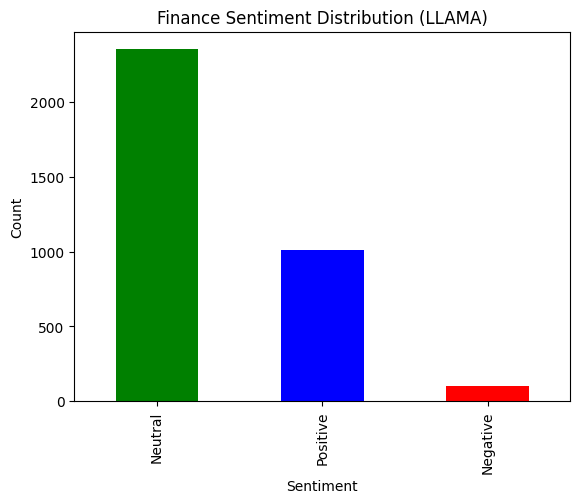

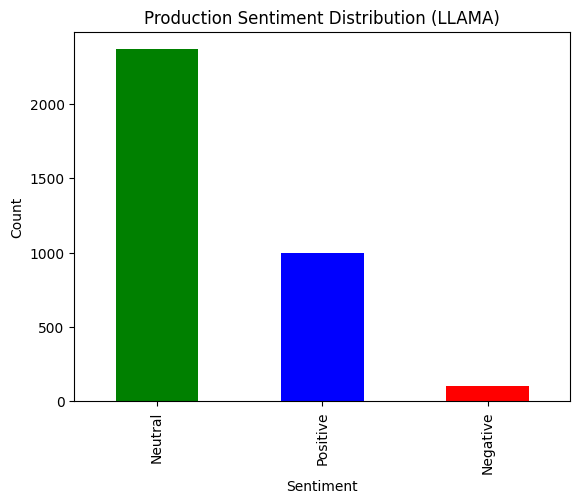

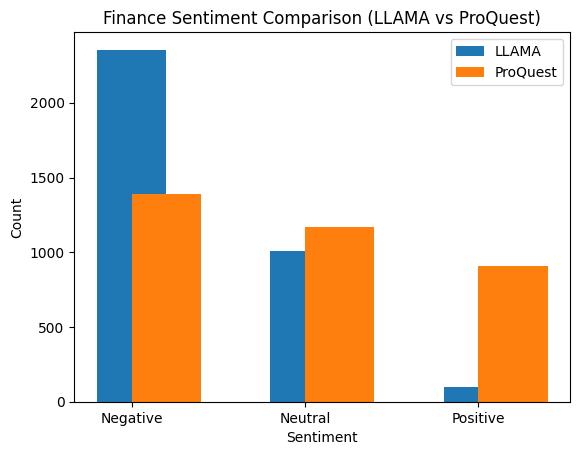

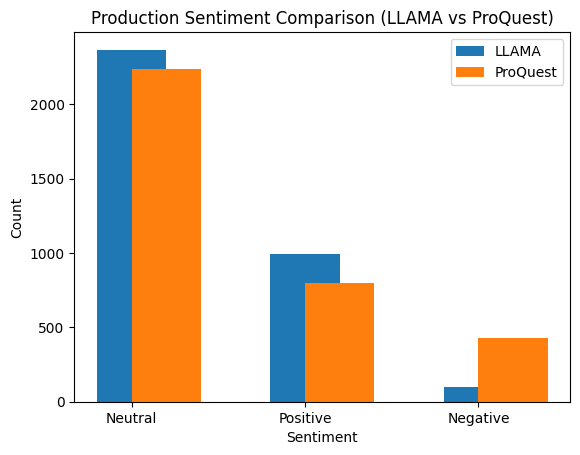

In [10]:
import matplotlib.pyplot as plt
# Filter both dataframes to include only rows with common unique IDs
filtered_llama_data_filtered = filtered_llama_data[filtered_llama_data['Unique_ID'].isin(common_unique_ids)]
proquest_data_filtered = proquest_data[proquest_data['Unique_ID'].isin(common_unique_ids)]

# Rename columns in filtered_llama_data to avoid confusion after merge
filtered_llama_data_filtered = filtered_llama_data_filtered.rename(columns={
    'Finance': 'Finance_Llama',
    'Production': 'Production_Llama',
    'Reserves / Exploration / Acquisitions / Mergers / Divestments': 'Reserves_Llama',
    'Environment / Regulatory / Geopolitics': 'Environment_Llama',
    'Alternative Energy / Lower Carbon': 'Alternative_Llama',
    'Oil Price / Natural Gas Price / Gasoline Price': 'Oil_Price_Llama'
})

# Merge the dataframes on 'Unique_ID'
merged_data = pd.merge(filtered_llama_data_filtered, proquest_data_filtered, on='Unique_ID', how='inner')

# Display the resulting dataframe
#import ace_tools as tools; tools.display_dataframe_to_user(name="Merged Data", dataframe=merged_data)

# Function to plot sentiment distribution
def plot_sentiment_distribution(df, column, title):
    sentiment_counts = df[column].value_counts()
    sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment distribution for Finance category
plot_sentiment_distribution(merged_data, 'Finance_Llama', 'Finance Sentiment Distribution (LLAMA)')

# Plot sentiment distribution for Production category
plot_sentiment_distribution(merged_data, 'Production_Llama', 'Production Sentiment Distribution (LLAMA)')

# Function to plot comparative sentiment distribution
def plot_comparative_sentiment_distribution(df, column_x, column_y, title):
    sentiment_counts_x = df[column_x].value_counts()
    sentiment_counts_y = df[column_y].value_counts()
    
    fig, ax = plt.subplots()
    index = sentiment_counts_x.index.union(sentiment_counts_y.index)
    
    ax.bar(index, sentiment_counts_x, width=0.4, align='center', label='LLAMA')
    ax.bar(index, sentiment_counts_y, width=0.4, align='edge', label='ProQuest')
    
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plot comparative sentiment distribution for Finance category
plot_comparative_sentiment_distribution(merged_data, 'Finance_Llama', 'Finance', 'Finance Sentiment Comparison (LLAMA vs ProQuest)')

# Plot comparative sentiment distribution for Production category
plot_comparative_sentiment_distribution(merged_data, 'Production_Llama', 'Production', 'Production Sentiment Comparison (LLAMA vs ProQuest)')


In [14]:
merged_data

,Unique_ID,Finance_Llama,Production_Llama,Reserves_Llama,Environment_Llama,Alternative_Llama,Oil_Price_Llama,Source,Ticker,Date,URL,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral,ProQuest,CVX,8/17/2022,https://www.proquest.com/newspapers/chevron-ge...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,PQ-2703147472,Neutral,Neutral,Neutral,Negative,Neutral,Neutral,ProQuest,XOM,8/17/2022,https://www.proquest.com/newspapers/oil-giants...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
2,PQ-2702197510,Positive,Positive,Neutral,Neutral,Neutral,Positive,ProQuest,CVX,8/15/2022,https://www.proquest.com/newspapers/chevron-sl...,Negative,Negative,Neutral,Neutral,Positive,Negative
3,PQ-2697049245,Neutral,Negative,Neutral,Neutral,Neutral,Negative,ProQuest,CVX,8/2/2022,https://www.proquest.com/newspapers/chevron-sl...,Negative,Neutral,Neutral,Neutral,Neutral,Negative
4,PQ-2696371267,Positive,Positive,Neutral,Neutral,Neutral,Positive,ProQuest,CVX,7/30/2022,https://www.proquest.com/newspapers/senators-a...,Neutral,Neutral,Negative,Negative,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,PQ-2238653651,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,ProQuest,PSX,6/12/2019,https://www.proquest.com/newspapers/as-price-g...,Neutral,Neutral,Neutral,Neutral,Neutral,Negative
3461,PQ-2239478009,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,ProQuest,PSX,6/10/2019,https://www.proquest.com/newspapers/phillips-6...,Positive,Neutral,Neutral,Neutral,Neutral,Neutral
3462,PQ-2238860015,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,ProQuest,PSX,6/7/2019,https://www.proquest.com/newspapers/autonomous...,Positive,Neutral,Neutral,Positive,Neutral,Neutral
3463,PQ-2233473767,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,ProQuest,PSX,6/3/2019,https://www.proquest.com/newspapers/united-sta...,Negative,Neutral,Neutral,Neutral,Neutral,Negative


In [13]:
merged_data.columns

Index(['Unique_ID', 'Finance_Llama', 'Production_Llama', 'Reserves_Llama',
       'Environment_Llama', 'Alternative_Llama', 'Oil_Price_Llama', 'Source',
       'Ticker', 'Date', 'URL', 'Finance', 'Production',
       'Reserves / Exploration / Acquisitions / Mergers / Divestments',
       'Environment / Regulatory / Geopolitics',
       'Alternative Energy / Lower Carbon',
       'Oil Price / Natural Gas Price / Gasoline Price'],
      dtype='object')

In [15]:
model_data = merged_data[['Source', 'Unique_ID', 'Ticker', 'Date','Finance_Llama', 'Production_Llama', 'Reserves_Llama',
       'Environment_Llama', 'Alternative_Llama', 'Oil_Price_Llama']]

In [17]:
model_data.rename(columns={
    'Finance_Llama': 'Finance',
    'Production_Llama': 'Production',
    'Reserves_Llama': 'Reserves / Exploration / Acquisitions / Mergers / Divestments',
    'Environment_Llama': 'Environment / Regulatory / Geopolitics',
    'Alternative_Llama': 'Alternative Energy / Lower Carbon',
    'Oil_Price_Llama': 'Oil Price / Natural Gas Price / Gasoline Price'
}, inplace=True)

In [18]:
model_data

,Source,Unique_ID,Ticker,Date,Finance,Production,Reserves / Exploration / Acquisitions / Mergers / Divestments,Environment / Regulatory / Geopolitics,Alternative Energy / Lower Carbon,Oil Price / Natural Gas Price / Gasoline Price
0,ProQuest,PQ-2703147472,CVX,8/17/2022,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
1,ProQuest,PQ-2703147472,XOM,8/17/2022,Neutral,Neutral,Neutral,Negative,Neutral,Neutral
2,ProQuest,PQ-2702197510,CVX,8/15/2022,Positive,Positive,Neutral,Neutral,Neutral,Positive
3,ProQuest,PQ-2697049245,CVX,8/2/2022,Neutral,Negative,Neutral,Neutral,Neutral,Negative
4,ProQuest,PQ-2696371267,CVX,7/30/2022,Positive,Positive,Neutral,Neutral,Neutral,Positive
...,...,...,...,...,...,...,...,...,...,...
3460,ProQuest,PQ-2238653651,PSX,6/12/2019,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3461,ProQuest,PQ-2239478009,PSX,6/10/2019,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3462,ProQuest,PQ-2238860015,PSX,6/7/2019,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
3463,ProQuest,PQ-2233473767,PSX,6/3/2019,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [19]:
model_data.to_csv('model_data.csv', index=True)